**IMPORTING LIBRARIES**

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

**IMPORTING DATASET**

In [80]:
data = pd.read_csv("/content/Titanic-Dataset.csv")

In [81]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**HANDLING NULL VALUES**

In [83]:
# Checking for Null Values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [84]:
data.dropna(subset=['Age'], inplace=True)

In [85]:
data['Cabin'].fillna('Unknown', inplace=True)

In [86]:
data.dropna(subset=['Embarked'], inplace=True)

In [87]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        712 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


**DATA VISUALISATION**

<Axes: >

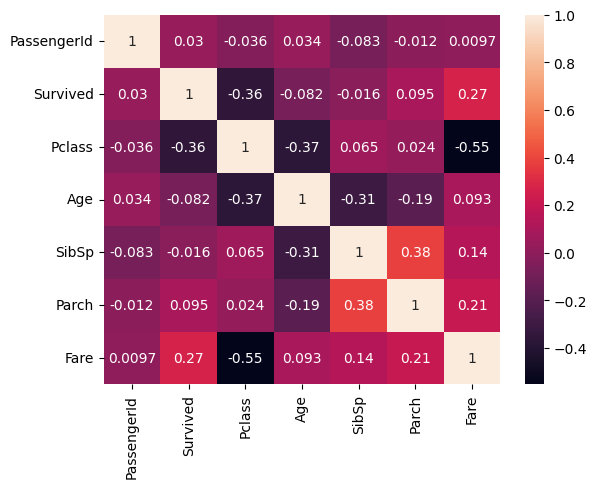

In [89]:
sns.heatmap(data.corr(numeric_only=True), annot=True)

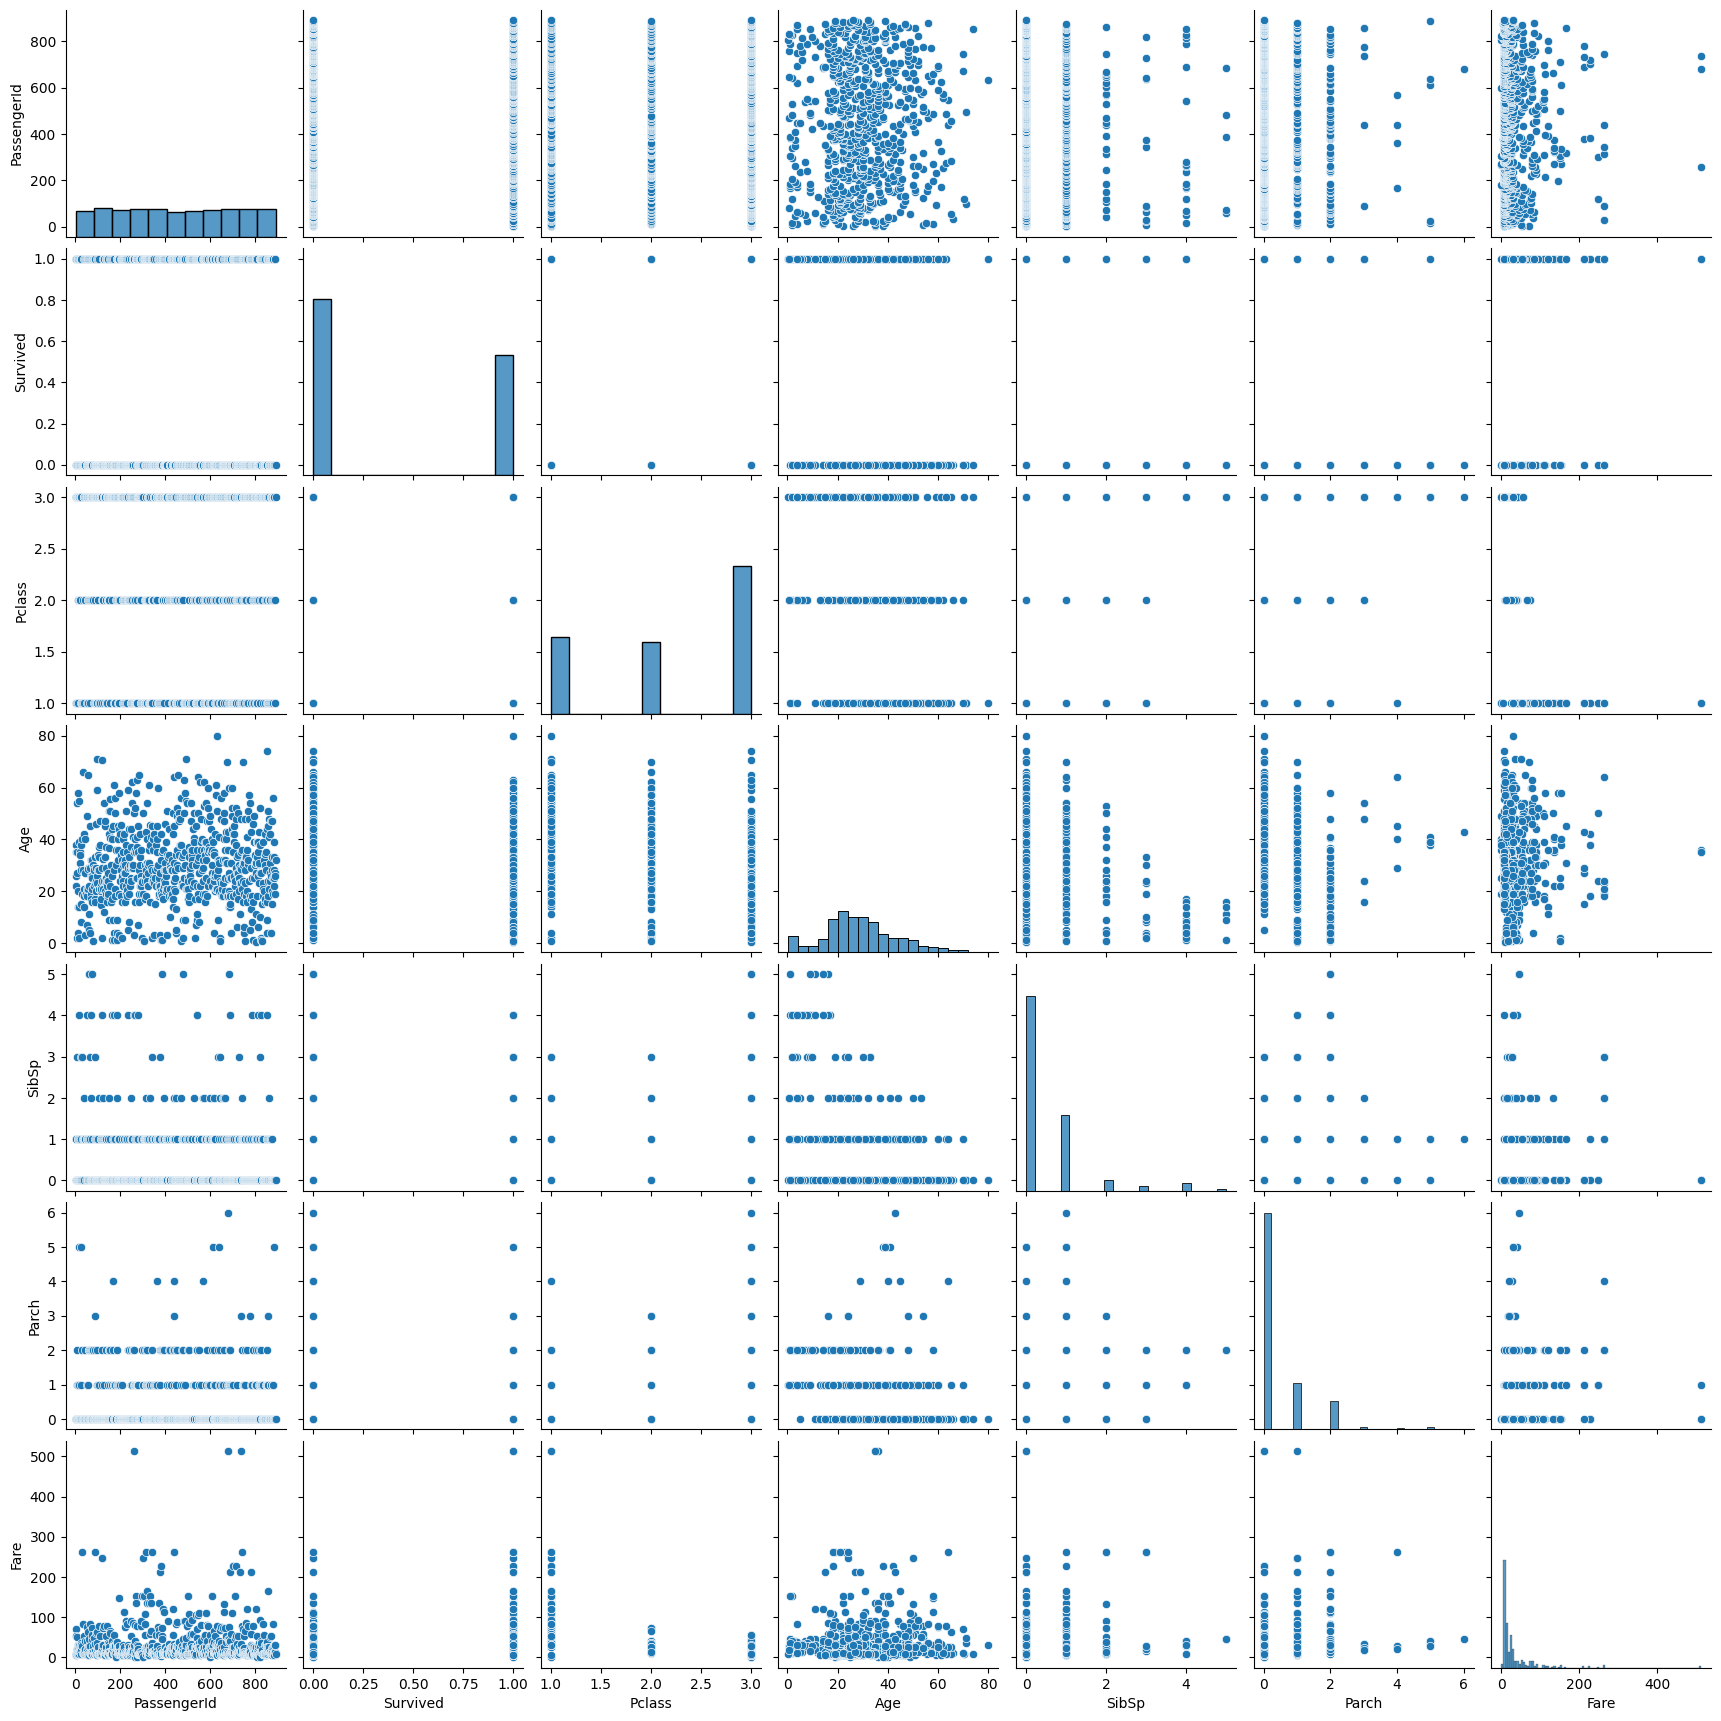

In [90]:
sns.pairplot(data)

**OUTLIER DETECTION**

<Axes: >

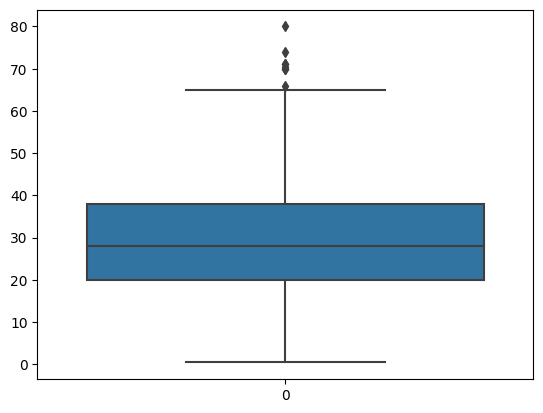

In [91]:
#Outlier Removal
sns.boxplot(data['Age'])

In [92]:
q1=data['Age'].quantile(0.25)
q3=data['Age'].quantile(0.75)
print(q1,q3)

20.0 38.0


In [93]:
IQR=q3-q1
IQR

18.0

In [94]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
print(upper_limit,lower_limit)

65.0 -7.0


In [95]:
data.median()

<ipython-input-95-135339ac59ce>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


PassengerId    445.00000
Survived         0.00000
Pclass           2.00000
Age             28.00000
SibSp            0.00000
Parch            0.00000
Fare            15.64585
dtype: float64

In [96]:
data = data[data['Age'] <= upper_limit]

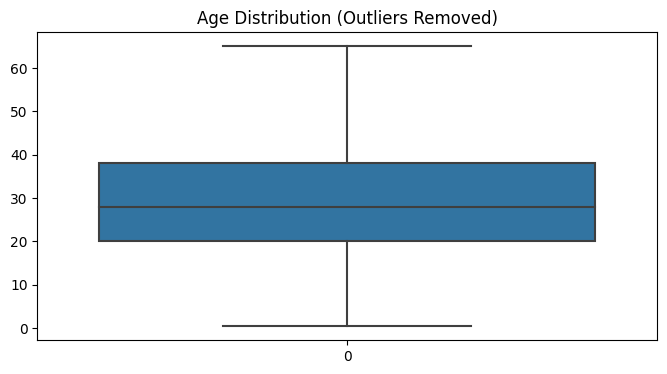

In [97]:
plt.figure(figsize=(8, 4))
sns.boxplot(data['Age'])
plt.title('Age Distribution (Outliers Removed)')
plt.show()

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  704 non-null    int64  
 1   Survived     704 non-null    int64  
 2   Pclass       704 non-null    int64  
 3   Name         704 non-null    object 
 4   Sex          704 non-null    object 
 5   Age          704 non-null    float64
 6   SibSp        704 non-null    int64  
 7   Parch        704 non-null    int64  
 8   Ticket       704 non-null    object 
 9   Fare         704 non-null    float64
 10  Cabin        704 non-null    object 
 11  Embarked     704 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 87.7+ KB


**Splitting data into dependent and independent varaible**

In [99]:
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

In [100]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,Q
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
889,1,male,26.0,0,0,30.0000,C


In [101]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 704, dtype: int64

**LABEL ENCODING**

In [102]:
#encoding
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])
X['Embarked'] = label_encoder.fit_transform(X['Embarked'])

<ipython-input-102-c3ad21fd5d43>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = label_encoder.fit_transform(X['Sex'])
<ipython-input-102-c3ad21fd5d43>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = label_encoder.fit_transform(X['Embarked'])


**FEATURE SCALING**

In [103]:
#Feature Scaling
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

<ipython-input-103-2024419e4f77>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])


**SPLITTING DATA INTO TRAINING AND TEST DATA**

In [104]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2,stratify=y)

In [105]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
151,1,0,-0.517446,1,0,0.601271,2
818,3,1,0.998990,0,0,-0.530528,2
360,3,1,0.782357,1,4,-0.126919,2
544,1,1,1.504469,1,0,1.350629,0
713,3,1,-0.011967,0,0,-0.473453,2
...,...,...,...,...,...,...,...
809,1,0,0.276878,1,0,0.347251,2
536,1,1,1.143413,0,0,-0.152321,2
759,1,0,0.276878,0,0,0.975715,2
210,3,1,-0.373023,0,0,-0.519238,2


In [106]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
686,3,1,-1.095136,4,1,0.094878,2
693,3,1,-0.300812,0,0,-0.515946,0
751,3,1,-1.672826,0,1,-0.417160,2
147,3,0,-1.456192,2,2,-0.005084,2
122,2,1,0.240772,1,0,-0.086073,0
...,...,...,...,...,...,...,...
440,2,0,1.143413,1,1,-0.157966,2
545,1,1,2.515427,0,0,-0.162670,2
97,1,1,-0.445235,0,1,0.540274,0
74,3,1,0.204667,0,0,0.411148,2


In [107]:
y_train

151    1
818    0
360    0
544    0
713    0
      ..
809    1
536    0
759    1
210    0
382    0
Name: Survived, Length: 563, dtype: int64

In [108]:
y_test

686    0
693    0
751    1
147    0
122    0
      ..
440    1
545    0
97     1
74     1
62     0
Name: Survived, Length: 141, dtype: int64

In [109]:
X_train.shape

(563, 7)

In [110]:
X_test.shape

(141, 7)

In [111]:
y_train.shape

(563,)

In [112]:
y_test.shape

(141,)